In [22]:
#first get the python modules we need
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.convolution import convolve, Box1DKernel
from astropy.table import Table
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interp1d
from craftroom import resample

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Checking Girish's final Dem spectrum 20200406

In [2]:
hdul = fits.open('spectrum_trappist_one_d13.fits')

In [3]:
hdul.info()

Filename: spectrum_trappist_one_d13.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     20   3805R x 4C   [D, D, D, D]   


In [4]:
data = hdul[1].data
data.names

['Wavelength', 'Flux_density', 'Lower_Error_16', 'Upper_Error_84']

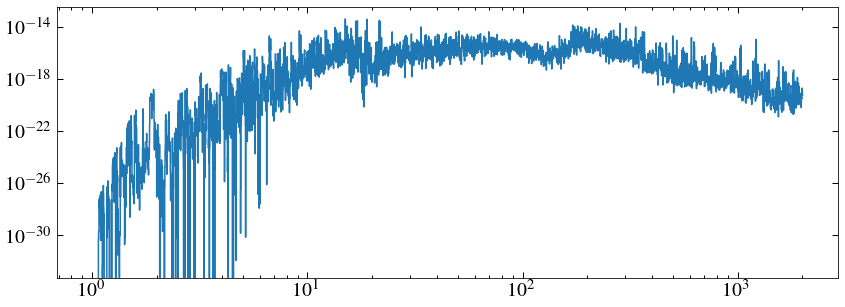

In [6]:
plt.step(data['Wavelength'], data['Flux_density'], where='mid')
plt.xscale('log')
plt.yscale('log')

In [7]:
print(data['Wavelength'][0], data['Wavelength'][-1] )

1.001 2000.998588410365


In [8]:
np.diff(data['Wavelength'])

array([2.00200000e-03, 2.00600400e-03, 2.01001601e-03, ...,
       3.97808092e+00, 3.98603708e+00, 3.99400916e+00])

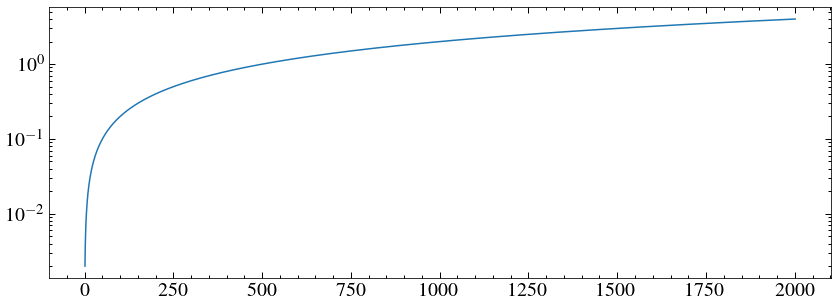

In [10]:
plt.plot(data['Wavelength'][1:], np.diff(data['Wavelength']))
plt.yscale('log')

How does this compare with the last verison?

In [11]:
odata = fits.getdata('trappist-1_dem_spectra.fits',1)

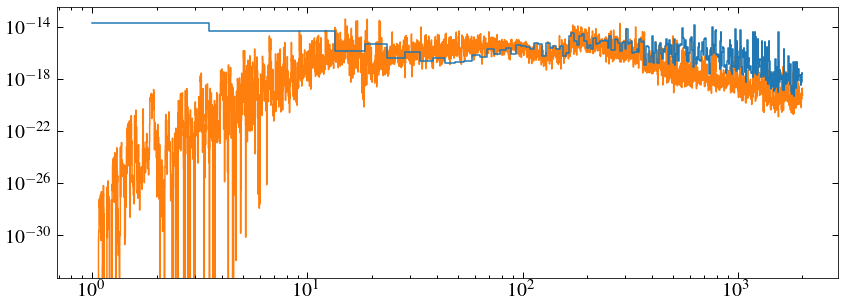

In [15]:
plt.step(odata['Wavelength'], odata['Flux_Density'], where='mid')
plt.step(data['Wavelength'], data['Flux_density'], where='mid', zorder=-1)
plt.xscale('log')
plt.yscale('log')

In [24]:
#fi = interp1d(data['Wavelength'], data['Flux_density'], fill_value='extrapolate')(odata['Wavelength'])
wi, fi = resample.bintogrid(data['Wavelength'], data['Flux_density'], newx= odata['Wavelength'])

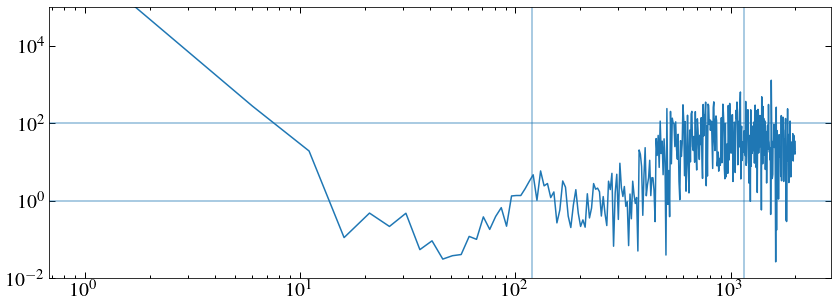

In [30]:
plt.plot(odata['Wavelength'], odata['Flux_Density']/fi)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.01, 1e5)
plt.axhline(1, alpha=0.5)
plt.axhline(100, alpha=0.5)
plt.axvline(1160, alpha=0.5)
plt.axvline(120, alpha=0.5)

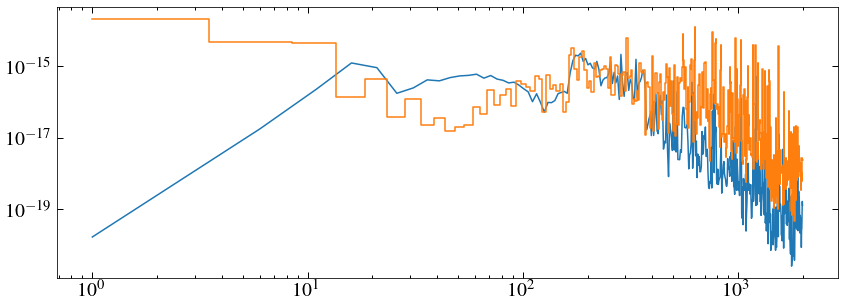

In [28]:
plt.plot(wi, fi)
plt.step(odata['Wavelength'], odata['Flux_Density'], where='mid')
plt.xscale('log')
plt.yscale('log')